<a href="https://colab.research.google.com/github/DonPeregrina/escuelaverano/blob/master/notebooks/1_CorpusLinguistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Escuela de Verano PLN 2020**. Sesión práctica, parte 1


---




# Cargamos corpus

**Vamos a utilizar esta biblioteca (Elotl) que permite trabajar con diversos corpus paralelos para lenguas habladas en México:**

[Consultar Documentación](https://pypi.org/project/elotl/)

[Comunidad Elotl](https://elotl.mx/)

In [1]:
!pip install elotl  #Tenemos que instalar la paquetería elotl desde pip  (esto se hace desde línea de comandos)

     |████████████████████████████████| 2.2MB 2.9MB/s 


In [3]:
#Paqueterías (ya instaladas) de Python que utilizaremos a lo largo de los ejercicios
from collections import defaultdict, Counter
from re import sub
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
import numpy as np

Importamos un corpus paralelo **español-náhuatl** ([Axolotl](https://axolotl-corpus.mx/)) y uno **español-otomí** ([Tsunkua](https://tsunkua.elotl.mx/))

In [4]:
import elotl.corpus
#1. El método corpus.load() nos regresa una lista multidimensional. Cada elemento de esta lista corresponde a una oración paralela del corpus más información extra del par de oraciones
corpus1=elotl.corpus.load('axolotl')  #español-náhuatl 
corpus2=elotl.corpus.load('tsunkua')  #español-otomi 
#Contenido de cada elemento de la lista:
  #Oración en Lengua 1 (español). Ejemplo: corpus1[0][0]
  #Oración en Lengua 2. Ejemplo: corpus1[0][1] 
  #Variante de la lengua 2. Ejemplo: corpus1[0][2]
  #Nombre del documento de dóónde fue extraido este fragmento paralelo. Ejemplo: corpus1[0][3]

In [6]:
corpus2[0:10]

[['Arde, se calcina su corazón y su cuerpo está doliente. De igual modo a mí me arde y se calcina mi corazón.',
  "Zo̱, da zot'i ri ndäte ne ri ngo̱k'ei yabu̱ xa ñ'u̱. Mahye̱gi nugi zo̱ ne da zät'i ma ndäte.",
  'Otomí del Mezquital (ote)',
  'Visión de los vencidos (hñahñu)',
  'visiondelosvencidoshnahnu.pdf',
  '5c8a6eb3656c6f188d010000'],
 ['Luego ya vienen, de nuevo vienen en seguimiento de Citlaltépec. A Tlacopan. Allí se establecen en el Palacio.',
  "Ebu̱ ba ehe man'aki ba te̱nga ra t'o̱ho̱  ra thuhu ra Citlaltépec. Tlacopan, Nubia ba o̱t'ra b'u̱i ha ra ndo̱m'ihmu.",
  'Otomí del Mezquital (ote)',
  'Visión de los vencidos (hñahñu)',
  'visiondelosvencidoshnahnu.pdf',
  '5c8a6eb3656c6f188d010000'],
 ['y mirad que no lo descubráis a hijo de madre, so pena de las graves penas de tirar hasta los cimientos de casas,',
  'y mirad que no lo descubráis a hijo de madre, so pena de las graves penas de tirar hasta los cimientos de casas,',
  'Otomí del Mezquital (ote)',
  'Visión de los v

# Estadísticas generales

**- Número de oraciones paralelas**

In [7]:
#1. El método len() de python regresa el número de elementos que tiene un objeto, en nuestro caso queremos saber cuántos elementos tienen las listas que contienen al corpus1 y al corpus2, respectivamente:
size_corpus1=len(corpus1)
size_corpus2=len(corpus2) 
print("Oraciones paralelas en corpus español-náhuatl:", size_corpus1)
print("Oraciones paralelas en corpus español-otomí:", size_corpus2)

Oraciones paralelas en corpus español-náhuatl: 16117
Oraciones paralelas en corpus español-otomí: 4963


**- Número total de palabras por lengua (tokens)**





In [8]:
#1. Vamos a extraer listas de palabras para cada lengua (a partir de los corpus paralelos): 
corpus1_es=[] #Lista de palabras en español del corpus 1 (español-náhuatl)
corpus1_na=[] #Lista de palabras en náhuatl del corpus 1 (español-náhuatl)
corpus2_es=[] #Lista de palabras en español del corpus 2 (español-otomí)
corpus2_ot=[] #Lista de palabras en otomí del corpus 2 (español-otomí)
words=[] #Lista temporal

#2. Vamos a iterar sobre cada línea de los corpus paralelos e ir guardando las palabras que corresponden a cada lengua:
#2.1 Por cada línea del Corpus español-náhuatl
for row in corpus1:   
  #2.1.1 Vamos con la oración en español (row[0]):
  row[0]=sub(r'[^\w\s]',' ',row[0])     #Sustituimos signos de puntuación por un espacio
  words=row[0].lower().split()          #Dividimos a la oración en palabras (el delimitador es un espacio), guardamos cada una de estas palabras como elementos de la lista words
  for w in words:                       #Iteramos sobre cada palabra de la oración (lista words)
       corpus1_es.append(w)             #vamos agregando cada palabra a una lista (corpus1_es), que al final contendrá todas las palabras en español del corpus1
  #2.1.2 Vamos con la oración en náhuatl (row[1]):    
  row[1]=sub(r'[^\w\s\']',' ',row[1])  #Sustituir signos de puntuación. Para el caso del náhuatl y el otomí se podríían estar filtrando caracteres que no son signos de puntuación sino marcas de tono o consonantes. Por ejemplo "'"
  words=row[1].lower().split()         #Dividimos a la oración en palabras (el delimitador es un espacio), guardamos cada una de estas palabras como elementos de la lista words
  for w in words:                      #Iteramos sobre cada palabra de la oración (lista words)
       corpus1_na.append(w)             #vamos agregando cada palabra a una lista (corpus1_na), que al final contendrá todas las palabras en náhuatl del corpus1

#2.2 Por cada línea del Corpus español-otomí  (mismo procedimiento)
for row in corpus2: 
  row[0]=sub(r'[^\w\s]',' ',row[0])   
  words=row[0].lower().split()  
  for w in words:
       corpus2_es.append(w)

  row[1]=sub(r'[^\w\s\']',' ',row[1]) 
  words=row[1].lower().split()
  for w in words:
       corpus2_ot.append(w)

#3. Calculamos el núúmero total de palabras utilizando la función len() sobre la listas de palabras que creamos:

print ("Número total de palabras en náhuatl (corpus1):", len(corpus1_na))
print ("Número total de palabras en español (corpus1):", len(corpus1_es))
print ("Número total de palabras en otomí (corpus2):", len(corpus2_ot))
print ("Número total de palabras en español (corpus2):", len(corpus2_es))


Número total de palabras en náhuatl (corpus1): 286805
Número total de palabras en español (corpus1): 389137
Número total de palabras en otomí (corpus2): 68540
Número total de palabras en español (corpus2): 56893


---


*   **Discusión:** ¿Por qué si los textos son paralelos (traducciones) el número de palabras cambia tanto entre lenguas? e.g., el español tiene ~100,000 palabras más que el náhuatl (corpus 1)


Por la naturaleza morfologica o por la topologia propia del lenguaje

Titamaltlakwah -
Nosotros comemos tamales

---


En NLP, al número total de palabras dentro de un texto (incluidas repeticiones) también se les conoce como número de **TOKENS**. Mientras que al número de palabras distintas se le conoce como número de **TIPOS** o  tamaño del vocabulario.

**- Frecuencia de las palabras y número de tipos por lengua**

Vamos a calcular las frecuencias de las palabras en cada lengua de una manera muy práctica. Utilizaremos una función de Python Counter() que regresa automáticamente las frecuencias de cada elemento de una lista. [Documentación](https://docs.python.org/3/library/collections.html)

In [10]:
#1. Le pasamos a la función Counter(), la lista de palabras que obtuvimos para cada lengua/corpus. La función nos regresará un tipo de diccionario (Python) donde cada elemento es un par: (palabra, frecuencia)
corpus1_na_voc=Counter(corpus1_na)
corpus1_es_voc=Counter(corpus1_es)
corpus2_ot_voc=Counter(corpus2_ot)
corpus2_es_voc=Counter(corpus2_es)

#2. Una vez obtenidos los diccionarios de frecuencias para cada lenguas, podemos utilizar varias de las funciones que permite Counter(). Por ejemplo, obtener los elementos más frecuentes most_common()
corpus1_es_voc.most_common()[0:10]

#Para saber la frecuencia de una palabra en particular. Ejemplo: corpus1_es_voc['hola'] 

[('de', 20783),
 ('y', 14325),
 ('la', 11211),
 ('que', 10841),
 ('el', 10435),
 ('en', 10158),
 ('a', 9671),
 ('se', 9603),
 ('los', 8859),
 ('las', 4032)]

In [11]:
corpus1_na_voc.most_common()[0:10]

[('yn', 18303),
 ('in', 14550),
 ('auh', 4422),
 ('ye', 3989),
 ('ynic', 3078),
 ('tlen', 3062),
 ('ca', 2568),
 ('de', 2506),
 ('ipan', 2460),
 ('ihuan', 2430)]

In [12]:
corpus2_ot_voc.most_common()[0:10]

[('ra', 5770),
 ('ya', 3861),
 ('bi', 2138),
 ('mi', 1760),
 ('ne', 1127),
 ('da', 1055),
 ('ha', 963),
 ('di', 861),
 ('ma', 763),
 ("n'a", 741)]

In [13]:
#3. Si contamos el número de elemento en el diccionario de frecuencias obtendremos el tamaño del vocabulario o número de tipos
print ("Tamaño del vocabulario de náhuatl (corpus1):", len(corpus1_na_voc))
print ("Tamaño del vocabulario de español (corpus1):", len(corpus1_es_voc))
print ("Tamaño del vocabulario de otomí (corpus2):", len(corpus2_ot_voc))
print ("Tamaño del vocabulario de español (corpus2):", len(corpus2_es_voc))


Tamaño del vocabulario de náhuatl (corpus1): 51286
Tamaño del vocabulario de español (corpus1): 26691
Tamaño del vocabulario de otomí (corpus2): 7480
Tamaño del vocabulario de español (corpus2): 8712


---


*   **Discusión:** ¿Cómo cambiarían estas estadísticas si no filtramos los signos de puntuación? 

¿Cómo afecta la falta de normalización ortográfica en lenguas como el náhuatl?


---

**- Longitud promedio de palabra para el español, otomí, náhuatl**

In [14]:
 #1. Calculamos la longitud de cada token para cada lengua y sacamos un promedio
  #Para evitar hacer código repetitivo, creamos una sola función que toma como entrada una lista de tokens y devuelve la longitud promedio:
 def avg_length(tokens): #lista de tokens
   total=0 #variable auxiliar
   for w in tokens:       #Por cada token de la lengua
    size=len(w)           #Devuelve el número de caracteres que posee el token
    total=total+size      #Por cada nuevo token vamos sumando su longitud
   avg=total/len(tokens)  #Calcular Promedio
   return avg

print ("Longitud promedio de palabra en náhuatl (corpus1):", avg_length(corpus1_na))
print ("Longitud promedio de palabra en español (corpus1):", avg_length(corpus1_es))
print ("Longitud promedio de palabra en otomí (corpus2):", avg_length(corpus2_ot))
print ("Longitud promedio de palabra en español (corpus2):", avg_length(corpus2_es))

Longitud promedio de palabra en náhuatl (corpus1): 6.358700162131065
Longitud promedio de palabra en español (corpus1): 4.619609546252348
Longitud promedio de palabra en otomí (corpus2): 3.5798657718120803
Longitud promedio de palabra en español (corpus2): 4.672033466331535




---


*Ejercicio*:
¿Cuál es la palabra más larga del náhuatl en el corpus?


---



# Visualización

- **Frecuencias**

Text(0.5, 1.0, 'Frequency of words')

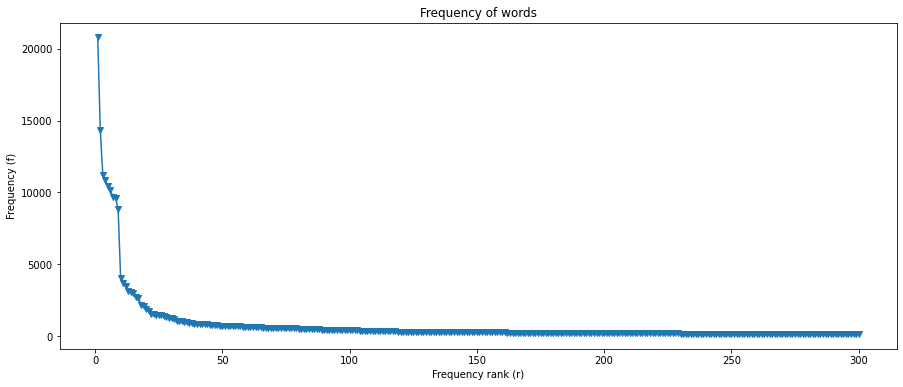

In [21]:
#1. Diseñamos una función que recibe un diccionario de palabra,frecuencia (c) y un umbral (n). Nos regresa una lista con las (n) frecuencias más altas del diccionario
def get_freqs(c, n): #counter and number of terms
  freqs=[]
  pairs=c.most_common(n)
  for p in pairs:
    freqs.append(p[1])
  return freqs   

#2. Aplicamos la función 
frequency=get_freqs(corpus1_es_voc, 300)    #Obtenemos las n frecuencias más altas (ordenadas) y las guardamos en una lista
x = list(range(1, 301))                     #Generamos una lista con números del 1 al n. Esto será el eje de las X en la gráfica y servirá para indicar el ranking de cada frecuencia (la frecuencia más grande ocupa el ranking 1 y así sucesivamente)
#p=np.array(frequency)
#prob=p/p.sum()

#3. Visualizamos con ayuda de matplotlib, y las dos listas que generamos: frequency, x 
plt.plot(x, frequency,'-v')
plt.xlabel('Frequency rank (r)')
plt.ylabel('Frequency (f)')
plt.title('Frequency of words')
  

**- Ley de Zipf**

Podemos ver que las frecuencias en las diferentes lenguas siguen un patrón parecido. Pocos palabras (tipos) son muy frecuentes, mientras que la mayoría de palabras ocurren con frecuencia baja.

De hecho, la frecuencia de la palabra que ocupa la posición r en el rank, es proporcional a 1/r (La palabra más frecuente ocurrirá aproximadamente el doble de veces que la segunda palabra más frecuente en el corpus y tres veces más que la tercer palabra más frecuente del corpus,...)

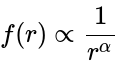

*r* es el rank de frecuencia que ocupa una palabra en el corpus

*f(r)* es la frecuencia de esa palabra

*alpha* es un parámetro, su valor puede cambiar dependiendo del corpus o fenómeno que estemos observando

Text(0.5, 1.0, 'Frequency of words')

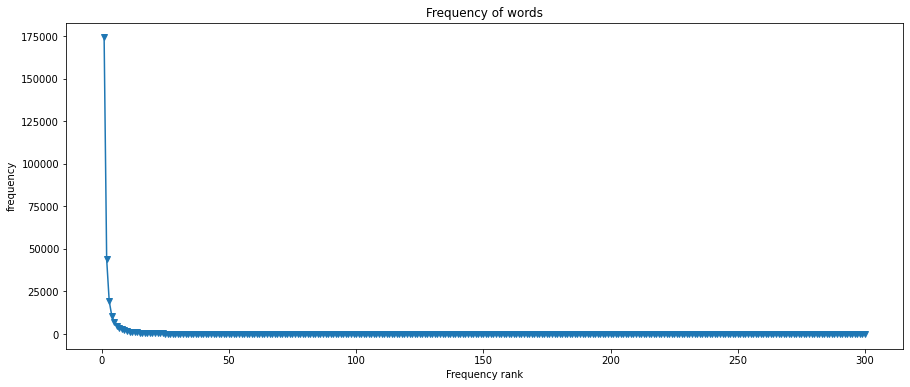

In [23]:
#1. Vamos a generar una lista de números aleatorios que sigan una distribución de Zipf (https://numpy.org/doc/stable/reference/random/generated/numpy.random.zipf.html)
a = 2                           # parametro alpha*
s = np.random.zipf(a, 286805)   #Número de elementos que queremos generar
s_voc=Counter(s)                   #Usando Counter obtenemos un diccionario de las frecuencias de cada número generado

#2. Extraemos las frecuencias de los primeros n elementos
frequency2=get_freqs(s_voc, 300)   

#3. Visualizamos las frecuencias y su rank usando matplotlib:
plt.plot(x, frequency2,'-v')
plt.xlabel('Frequency rank')
plt.ylabel('frequency')
plt.title('Frequency of words')

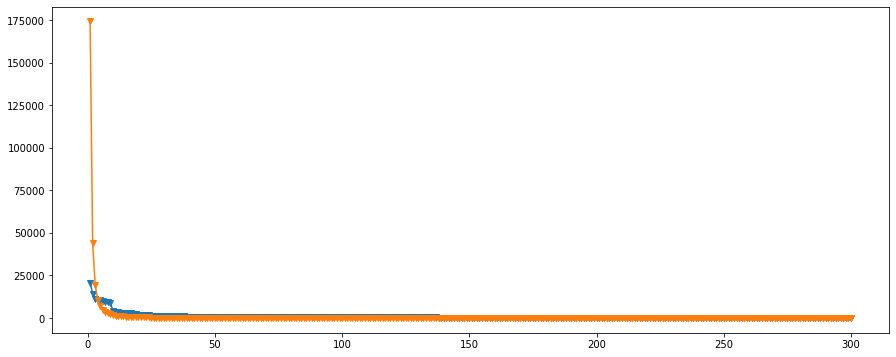

In [24]:
#4. Juntamos las dos curvas (corpus real y números aleatorios generados con Zipf):
plt.figure()
plot1=plt.plot(x, frequency,'-v')
plot2=plt.plot(x, frequency2,'-v')


**- Calcular la longitud promedio de las palabras en la "cabeza" y en la "cola" de la distribución**

In [17]:
 # 1. Creamos dos funciones para extraer n palabras de la cabeza (más frecuentes) y n palabras de la cola (menos frecuentes)

 #1.1 Función para extraer las n palabras menos frecuentes (cola)
 def get_words_tail(c, n):                   #Recibe un diccionario (c) y el número de elementos que queremos extraer (n)
  words=[]
  pairs=c.most_common()[:-n-1:-1]
  for p in pairs:
    words.append(p[0])
  return words                                 #Regresa una lista de palabras

 #1.2 Función para extraer las n palabras más frecuentes (cabeza)
 def get_words_head(c, n):                      #Recibe un diccionario (c) y el número de elementos que queremos extraer (n)
  words=[]
  pairs=c.most_common(n)
  for p in pairs:
    words.append(p[0])
  return words                                  #Regresa una lista de palabras


words_head=get_words_head(corpus2_ot_voc, 19)   #Obtenemos la lista de n palabras más frecuentes (cabeza de la distribución)
words_tail=get_words_tail(corpus2_ot_voc, 19)   #Obtenemos la lista de n palabras menos frecuentes (cola de la distribución)

#2. Utilizamos la función avg_length(), que realizamos anteriormente en otra celda, para calcular la longitud promedio de las palabras en una lista: 
print ("Longitud promedio de las palabras más frecuentes:", avg_length(words_head))  
print ("Longitud promedio de las palabras menos frecuentes:", avg_length(words_tail))

Longitud promedio de las palabras más frecuentes: 2.3157894736842106
Longitud promedio de las palabras menos frecuentes: 7.421052631578948


---


*   **Discusión:** ¿Por qué las palabras más frecuentes son más cortas?
 Por economia o por otras cosas asi

---

**- Nubes de palabras**

Ocuparemos la biblioteca WordCloud, que permite diversas opciones para personalizar  nubes de palabras basadas en frecuencias. [Ver documentación](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

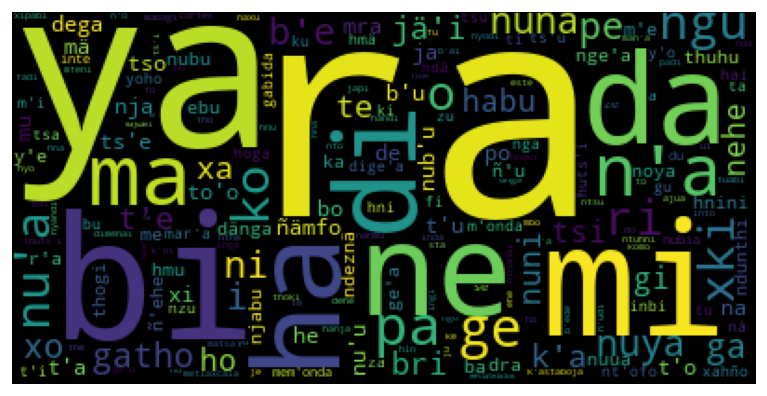

In [29]:
from wordcloud import WordCloud  #Biblioteca
#1. Inicializamos un objeto WordCloud, se pueden establecer diversos parámetros para personalizar la nube. Nosotros solo establecemos una instancia con los paráámetros default ()
mycloud = WordCloud()   

#2. Le pasamos al objeto los datos para alimentar a la nube. En nuestro caso, un diccionario de palabras con su frecuencia. (también se le puede pasar directamente un texto y la biblioteca calculará las frecuencias)
mycloud.generate_from_frequencies(corpus2_ot_voc)

#3. Visualizamos nuestro objeto con ayuda de matplotlib
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(mycloud)
plt.axis("off")
plt.savefig('/content/nube_otomi.png') #Si queremos guardar la imagen en el drive, aquí específicamos la ruta

---


*Ejercicio*:
Generar y guardar las nubes de palabras para todos los corpus, con diferentes parámetros

---


Las nubes están llenas de **palabras funcionales** o **"stop words"**, es decir, palabras que no tienen tanto contenido semáántico y que más bien tienen una función gramatical. 

En NLP suelen eliminarse, esto constituye un paso de **pre-procesamiento** típico. Es por esto que existen diversas herramientas que facilitan este tipo de tareas. Veremos el caso de la **biblioteca NLTK**

In [27]:
import nltk                      #Biblioteca para tareas de PLN
from nltk.corpus import stopwords 
nltk.download('stopwords')       #Descargar lista de stopwords o palabras funcionales para muchas lenguas 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

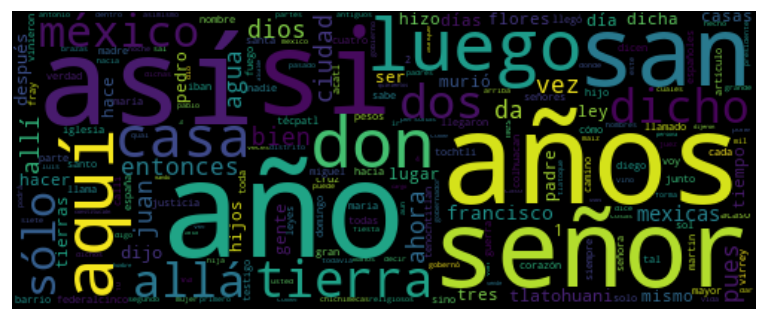

In [28]:
#1. Utilizando NLTK obtendremos una lista pre-compilada de stop-words para el español.
language = "spanish"     #Definimos una lengua para la cual queremos filtrar las palabras funcionales  
palabrasfuncionales = stopwords.words(language) #Usando la función stopwords de nltk generamos una lista de palabras funcionales comunes del español

#2. Usando nuestro diccionario (donde guardamos las palabras y frecuencias del español), nos quedaremos solo con aquellas palabras que NO aparezcan en la lista palabrasfuncionales:
corpus1_es_voc_filtered={a: b for a, b in corpus1_es_voc.items() if a not in palabrasfuncionales}

#3. Generamos un nuevo objeto WordCloud con el nuevo diccionario sin palabras funcionales/stopwords:
cloud_filtered = WordCloud(width=500, height=200)
cloud_filtered.generate_from_frequencies(corpus1_es_voc_filtered)

#4. Visualizamos nuestro objeto con ayuda de matplotlib
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(cloud_filtered, interpolation="bilinear")
plt.axis("off")
plt.savefig('/content/nube_esp_filtered.png') #Si queremos guardar la imagen en el drive, aquí específicamos la ruta
plt.show() #Esta función muestra la imagen generada

---


*   **Discusión:** ¿Qué podemos hacer para el caso del náhuatl y el otomi si no tienen paquetería especializada para realizar este filtrado de stop words?


---